# Visualizing Earning Based on College Majors
## Compiled By: Dana Hagist

Throughout this course, I've been creating plots using pyplot and matplotlib directly. When we want to explore a new dataset by quickly creating visualizations, using these tools directly can be cumbersome. Thankfully, pandas has many methods for quickly generating common plots from data in DataFrames. Like pyplot, the plotting functionality in pandas is a wrapper for matplotlib. This means we can customize the plots when necessary by accessing the underlying Figure, Axes, and other matplotlib objects. 

In this guided project, I'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations. 

I'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:
- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:
- Do students in more popular majors make more money?
    - Using scatter plots
- How many majors are predominantly male? Predominantly female?
    - Using histograms
- Which category of majors have the most students?
    - Using bar plots

I'll explore how to do these and more while primarily working in pandas. Before I start creating data visualizations, I'll import the libraries I need and remove rows containing null values.

Task:
Let's setup the environment by importing the libraries we need and running the necessary Jupyter magic so that plots are displayed inline.
- Import pandas and matplotlib into the environment.
- Run the Jupyter magic %matplotlib inline so that plots are displayed inline.

In [2]:
# Solution: 
import pandas as pd
import matplotlib as mpl
% matplotlib inline

Task:
Read the dataset into a DataFrame and start exploring the data.
- Read recent-grads.csv into pandas and assign the resulting DataFrame to recent_grads.
- Use DataFrame.iloc[] to return the first row formatted as a table.

In [5]:
# Solution: 
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

Task: Use DataFrame.head() and DataFrame.tail() to become familiar with how the data is structured.

In [6]:
# Solution: 
recent_grads.head(1)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


In [7]:
# Solution, cont:
recent_grads.tail(1)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.87796,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


Task: Use DataFrame.describe() to generate summary statistics for all of the numeric columns.

In [8]:
# Solution: 
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Task: Drop rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.
- Look up the number of rows in recent_grads and assign the value to raw_data_count.
- Use DataFrame.dropna() to drop rows containing missing values and assign the resulting DataFrame back to recent_grads.
- Look up the number of rows in recent_grads now and assign the value to cleaned_data_count. If you compare cleaned_data_count and raw_data_count, you'll notice that only one row contained missing values and was dropped.

In [9]:
# Solution: 
raw_data_count = len(recent_grads)
print(raw_data_count)

173


In [10]:
# Solution, cont: 
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads)
print(cleaned_data_count)

172


### Exploring Relationships

Most of the plotting functionality in pandas is contained within the DataFrame.plot() method. When we call this method, we specify the data we want plotted as well as the type of plot. We use the kind parameter to specify the type of plot we want. We use x and y to specify the data we want on each axis. You can read about the different parameters in the documentation.


recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')

If you create a new cell in jupyter notebook and run the above code, the scatter plot will be displayed immediately. This functionality is a byproduct of running the jupyter magic %matplotlib inline. This means we can write one line of code to generate a scatter plot, run the cell using a keyboard shortcut, inspect the plot, and repeat. The DataFrame.plot() method has a few parameters we can use for tweaking the scatter plot:

recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', title='Employed vs. Sample_size', figsize=(5,10))

We can access the underlying matplotlib Axes object by assigning the return value to a variable:

ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
ax.set_title('Employed vs. Sample_size')

When you run the code above in a jupyter notebook cell, the plot will be returned inline just like before.

Task:
Generate scatter plots in separate jupyter notebook cells to explore the following relations:
- Sample_size and Median
- Sample_size and Unemployment_rate
- Full_time and Median
- ShareWomen and Unemployment_rate
- Men and Median
- Women and Median

Use the plots to explore the following questions:
- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?

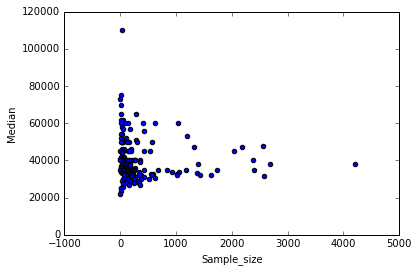

In [11]:
# Solution (all following Scatter plot cells):
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

Based on the above, appears that many majors have a small sample size, with a distribution across a large income range.  The majors with larger sample sizes tend to sit at the low to middle of the income range. 

It may be more useful to explore this relationship with the axes flipped, so that we can understand the sample sizes based on median incomes.  I look at the relationship from that perspective below.

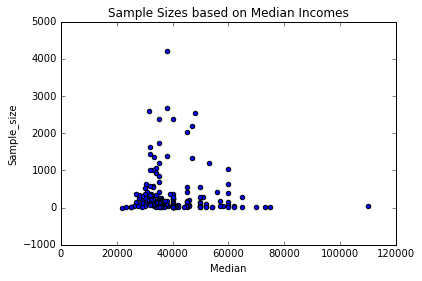

In [12]:
recent_grads.plot(x='Median', y='Sample_size', kind='scatter', title='Sample Sizes based on Median Incomes')

Here it apapears that we have a relatively normal distribution of median incomes based on sample sizes.  However, there does seem to be a little bit more of the distribution centered on the left hand side (lower incomes) and we have an outlier on the far right with an approximately $110k median income.

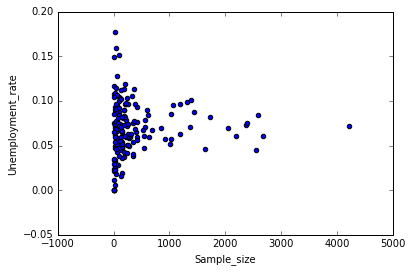

In [13]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

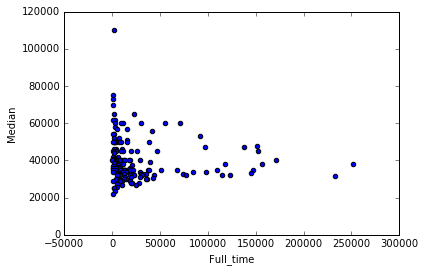

In [15]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

In the plot above, we can see that as median income goes up, there are less full time employees.  Stated another way, those majors with the lowest number of full time employees tend to have much higher salaries.

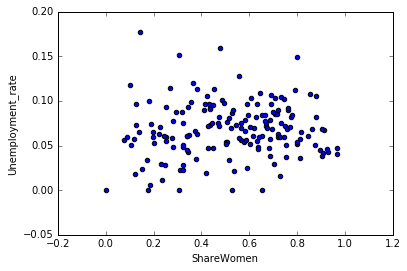

In [16]:
recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter')

The plot above appears to indicate that the proportion of women in a particular major is not strongly related to the unemployment rate for that major.  There is a lot of variance in the data.

Another interesting question to ask with regards to the share of women in a major is whether the woman-dominated majors make more or less money.  I explore this question in the plot below:

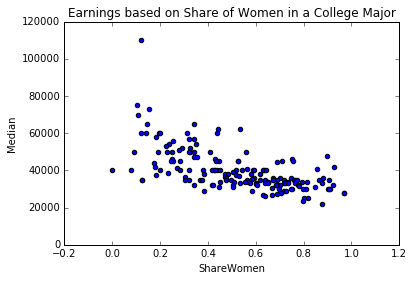

In [17]:
recent_grads.plot(x='ShareWomen',y='Median',kind='scatter',title='Earnings based on Share of Women in a College Major')

The above plot suggests that the larger the share of women in a particular major, the lower the median income for that major.  This does appear to be a relatively strong negative correlation between these variables.

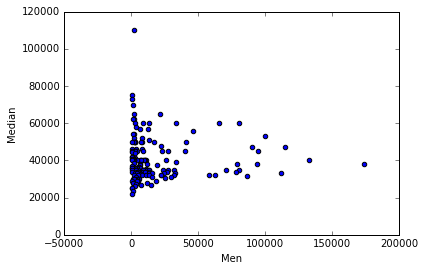

In [18]:
recent_grads.plot(x='Men',y='Median',kind='scatter')

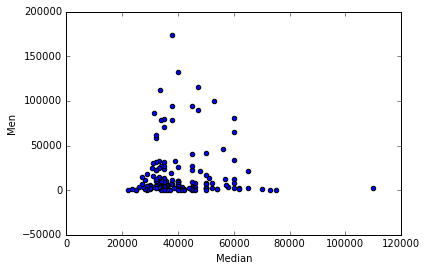

In [19]:
recent_grads.plot(x='Median',y='Men',kind='scatter')

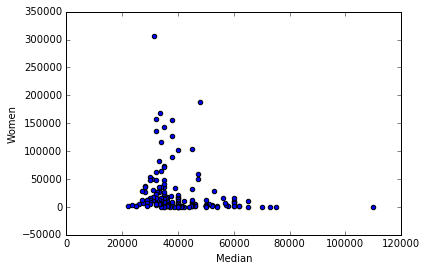

In [20]:
recent_grads.plot(x='Median',y='Women',kind='scatter')

The above two graphs suggest that there are there are more men who graduate in higher paying majors than women.  More specifically, the data suggests that many women are centered around the high \$30k salary range and men are centered around the low \$40k salary range.

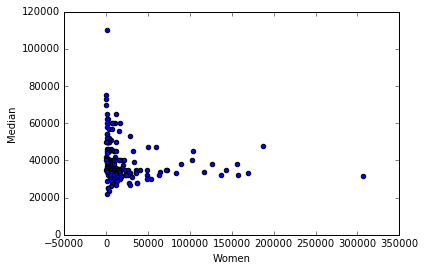

In [21]:
recent_grads.plot(x='Women',y='Median',kind='scatter')

### Understanding Distributions:

To explore the distribution of values in a column, we can select it from the DataFrame, call Series.plot(), and set the kind parameter to hist:

recent_grads['Sample_size'].plot(kind='hist')

The DataFrame.plot() and Series.plot() methods have many of the same parameters but are used for different use cases. We use Series.plot() to plot a specific column and DataFrame.plot() to generate plots that use values from multiple columns. For example, because scatter plots are generated using 2 sets of values (one for each axis), we can't create a scatter plot using Series.plot().

Unfortunately, Series.plot() doesn't contain parameters for tweaking a histogram because it was implemented to handle generating standard plots with default settings quickly. If we want to control the binning strategy of a histogram, we should use Series.hist() instead, which contains parameters specific to customizing histograms:

recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

Task: Generate histograms in separate jupyter notebook cells to explore the distributions of the following columns:
- Sample_size
- Median
- Employed
- Full_time
- ShareWomen
- Unemployment_rate
- Men
- Women

We encourage you to experiment with different bin sizes and ranges when generating these histograms.

Use the plots to explore the following questions:
- What percent of majors are predominantly male? Predominantly female?
- What's the most common median salary range?

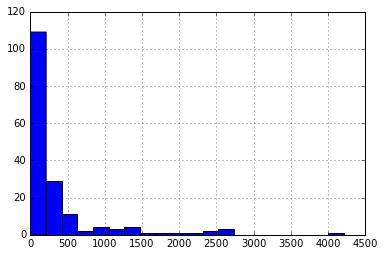

In [28]:
# Solution (all following histogram cells): 
recent_grads['Sample_size'].hist(bins=20)

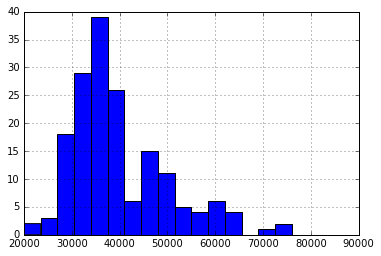

In [29]:
ax=recent_grads['Median'].hist(bins=20, range=(20000,90000))

The plot above suggests that the most common median salary is a little below \$40k in the recent grads dataset.  The distribution appears to have a right skew because of the relatively low number of individuals that have very high incomes.

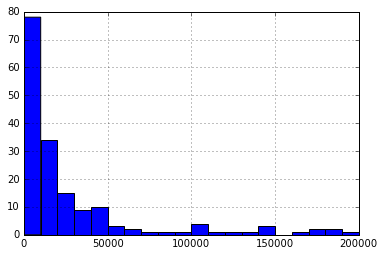

In [30]:
ax=recent_grads['Employed'].hist(bins=20, range=(0,200000))

The histogram above suggests that there are a large number of majors where the number of employed recent grads is extremely low.  The number of majors that have a high number of individuals employed is very low.  It's striking to see that the majors who have almost no recent grads employed towers above the rest.

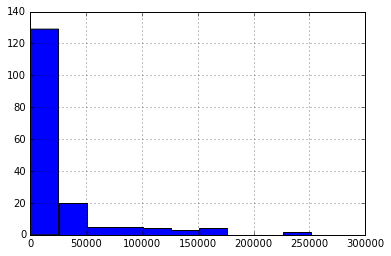

In [31]:
recent_grads['Full_time'].hist()

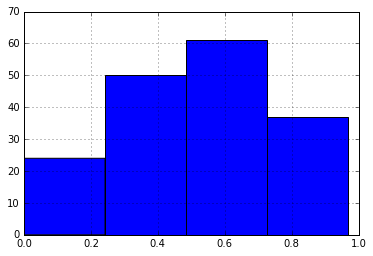

In [32]:
recent_grads['ShareWomen'].hist(bins=4)

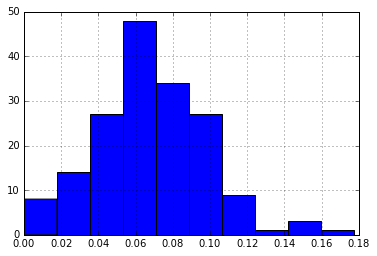

In [33]:
recent_grads['Unemployment_rate'].hist()

The plot above suggests that most majors have a somewhat normally distributed unemployment rate, but there are some majors that have very high levels of unemployment.  Those may be majors that are best avoided by college students.

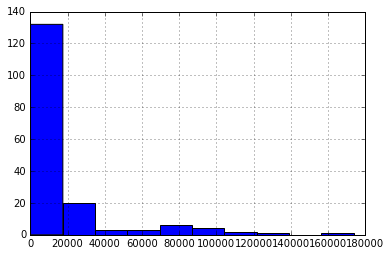

In [34]:
recent_grads['Men'].hist()

(0, 160)

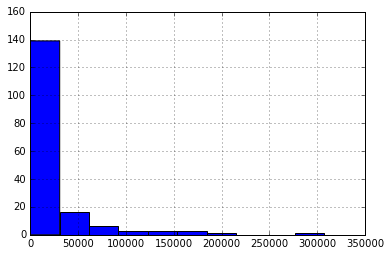

In [35]:
ax=recent_grads['Women'].hist()
ax.set_ylim(0,160)

### Introducing Scatter Matrices

In the last 2 steps, I created individual scatter plots to visualize potential relationships between columns and histograms to visualize the distributions of individual columns. A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. A scatter matrix plot consists of n by n plots on a grid, where n is the number of columns, the plots on the diagonal are histograms, and the non-diagonal plots are scatter plots.

Because scatter matrix plots are frequently used in the exploratory data analysis, pandas contains a function named scatter_matrix() that generates the plots for us. This function is part of the pandas.tools.plotting module and needs to be imported separately. To generate a scatter matrix plot for 2 columns, select just those 2 columns and pass the resulting DataFrame into the scatter_matrix() function.

scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))

While passing in a DataFrame with 2 columns returns a 2 by 2 scatter matrix plot (4 plots total), passing in one with 3 returns a 3 by 3 scatter matrix plot (9 plots total). This means that the number of plots generated scales exponentially by a factor of 2, not linearly. If you increase the number of columns to 4 or more, the resulting grid of plots becomes unreadable and difficult to interpret (even if you increase the plotting area using the figsize parameter).

Unfortunately, the documentation for scatter_matrix() is missing from the pandas website. If you want to read more about the parameters the function accepts, read the comments in the source code for the function at https://github.com/pandas-dev/pandas/blob/master/pandas/tools/plotting.py

Task:
- Import scatter_matrix from pandas.tools.plotting
- Create a 2 by 2 scatter matrix plot using the Sample_size and Median columns.
- Explore the questions from the last few steps using these scatter matrix plots. You may need to create more scatter matrix plots.

In [36]:
# Solution (below scatter matrix cells):
import pandas.tools.plotting as pltng

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f263e31a278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f263e1de470>]], dtype=object)

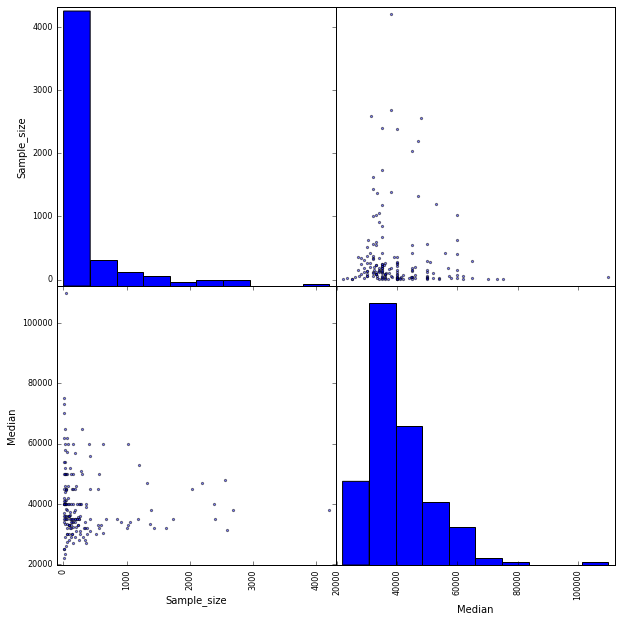

In [37]:
# Solution, cont: 
pltng.scatter_matrix(recent_grads[['Sample_size','Median']], figsize=(10,10))

Above is a scatter matrix based on sample size and median income.  What this matrix tells you, in order: Top left plot tells you that there are a large number of small sample sizes for majors.  This means that for many majors, the sample from which to draw conclusions was generally small.  Top right shows you that the sample sizes for lower average incomes is relatively large, and then as the median incomes increases, the sample sizes gets smaller.  Bottom left tells you the same story but with the axes reversed.  We can see here that the largest sample sizes tend to be in the low to average (median) income range.  The bottom right shows the frequency of median incomes, where again you can see that the frequency of smaller incomes is larger.  Both income extremes, small and large, are represented by a smaller number of observations.

Task: Create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f263e5232b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f263e066470>]], dtype=object)

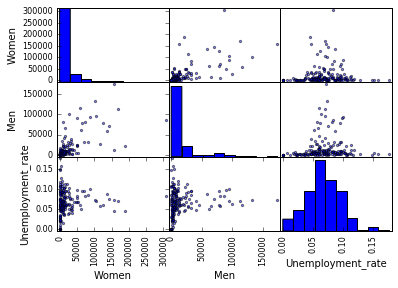

In [38]:
# Solution: 
pltng.scatter_matrix(recent_grads[['Women','Men','Unemployment_rate']])

There do not appear to be many significant takeaways based on the above matrix.  It does not appear, for example, that the unemployment rates for majors women graduate from are significantly different than for men.  The majors that have the fewest female graduates also appear to have the lowest number of male graduates.  Generally, as the male graduates increase, the female graduates increase.  However, there are clearly majors with both a lower number of female graduates and high male graduates, and a number of majors with low male graduates and very high female graduates.

### Understanding High and Low Paying Majors with Bar Plots

To create bar plots in matplotlib, we had to specify many aspects of the bar plot ourselves. We had to specify the locations, labels, lengths, and widths of the bars. When creating bar plots using pandas, we only need specify the data we want the bars to represent and the labels for each bar. The following code returns a bar plot of the first 5 values in the Women column:

recent_grads[:5]['Women'].plot(kind='bar')

By default, pandas will use the default labels on the x-axis for each bar (1 to n) from matplotlib. If we instead use the DataFrame.plot.bar() method, we can use the x parameter to specify the labels and the y parameter to specify the data for the bars:


recent_grads[:5].plot.bar(x='Major', y='Women')

Task: Use bar plots to compare the percentages of women (ShareWomen) from the 10 highest paying majors and from the 10 lowest paying majors.

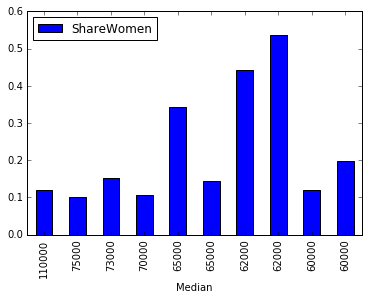

In [40]:
# Solution: 
recent_grads[:10].plot.bar(x='Median', y='ShareWomen')

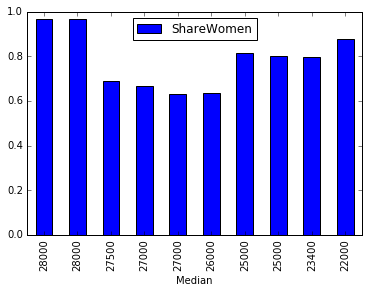

In [41]:
# Solution, cont:
recent_grads[len(recent_grads)-10:].plot.bar(x='Median', y='ShareWomen')

Based on the above two plots, it appears that the majors with the highest median salaries have very low shares of women.  There are a few execeptions to this, but appears to be the general conclusion.  Conversely, when you look at the majors that have the lowest median incomes, they have the highest share of female graduates.  Some of these appear to be almost exclusively female.  I'm interested to know which majors these, which is explored in the last step of the project.

Task: Use bar plots to compare the unemployment rate (Unemployment_rate) from the 10 highest paying majors and from the 10 lowest paying majors.

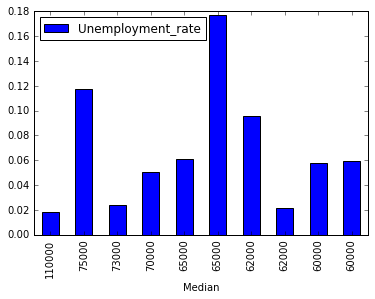

In [42]:
# Solution: 
recent_grads[:10].plot.bar(x='Median',y='Unemployment_rate')

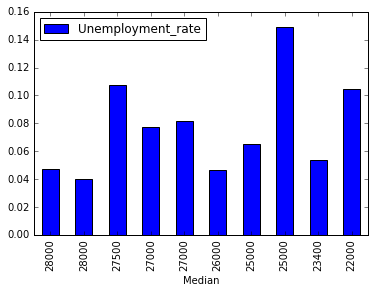

In [43]:
# Solution, cont:
recent_grads[len(recent_grads)-10:].plot.bar(x='Median',y='Unemployment_rate')

Based on the two plots above, it appears that the majors with the highest median incomes have highly variable unemployment rates.  The general range is from approximately 2% up to close to 20%.  When you look at the lowest paying majors, the variance is slightly smaller, with a range from approximately 4% to 15%, with most hovering around the 6% to 8% margin.  The comparison of these two bar plots lends some supporting evidence to the idea that higher paying degrees, or a higher cost of labor, will lead to reduced demand for said labor.

### End of Guided Steps

In this guided project, we learned how to use the plotting tools built into pandas to explore data on job outcomes. If you head over to the documentation on plotting in pandas, you'll notice that there's built in support for many more plots.

We encourage you to keep exploring these other visualizations on your own. Here are some ideas:
- Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
- Use a box plot to explore the distributions of median salaries and unemployment rate.
- Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.

### Share of Women in High and Low Paying Majors

An additional step I wanted to take is understanding the share of women making up the highest paying and lowest paying majors.  I explore this relationship below:

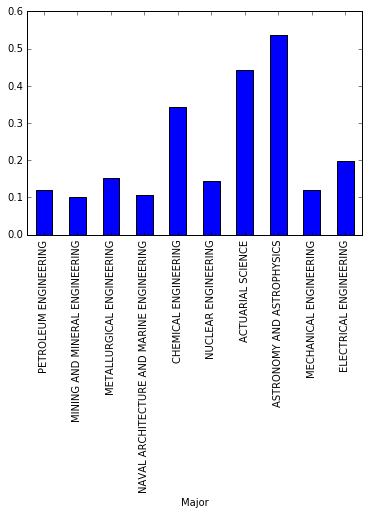

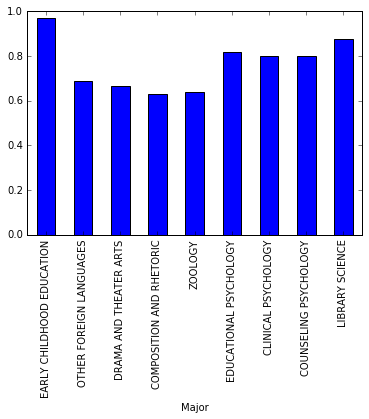

In [45]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)

The bar plots above tell us a number of things.  One thing we can see is that the top ten paying degrees are heavily represented by the Engineering disciplines.  Women have a relatively even share with men in Chemical Engineering, Actuarial Sciences, and Astronomy/Astrophysics.  For the lowest paying disciplines, there is a wide variance in representation by women, although women make up the majority of the education and mental health fields.